In [1]:
# Let's import the libraries we need for this initial analysis:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn

In [2]:
# (available here: https://openpolicing.stanford.edu/data/) 
# containing data about all police stops in IL from 2004-2015:
ca_stop = pd.read_csv('Vehicle_and_Pedestrian_Stop_Data_2010_to_Present.csv', dtype={'officer2_division': object})

In [3]:
ca_stops = ca_stop.drop(columns=['reference_number', 'descent_code', 'officer1_serialnum','officer2_serialnum','officer2_division','division_desc2'])

In [4]:
ca_stops.describe()

,stop_number,reporting_district
count,1.048575e+06,1.048575e+06
mean,9.171748e+06,1.093498e+03
std,9.521988e+05,7.577497e+02
min,7.792365e+06,1.010000e+02
25%,8.341156e+06,5.810000e+02
50%,8.748961e+06,9.850000e+02
75%,1.018757e+07,1.547000e+03
max,1.350398e+07,9.999000e+03


In [16]:
ca_stops.head(50)

,stop_number,gender,descent_desc,stop_date,stop_time,officer1_division,division_desc1,reporting_district,stop_type,post_stop_activity_indicator,day_of_year
0,12984268,M,BLACK,8/6/16,21:55,19,MISSION,1918,PED,N,219
1,12987768,F,BLACK,8/9/16,0:10,26,VALLEY TRAFFIC,974,VEH,N,222
2,12987840,F,WHITE,8/9/16,19:39,8,WEST LA,822,VEH,N,222
3,12991260,F,ASIAN,8/10/16,20:55,8,WEST LA,833,VEH,N,223
4,12991647,F,WHITE,8/10/16,20:20,19,MISSION,914,PED,Y,223
5,12992380,M,OTHER,8/11/16,10:20,27,WEST TRAFFIC,723,VEH,N,224
6,12994570,F,WHITE,8/12/16,23:00,12,SEVENTY-SEVENTH,1267,VEH,N,225
7,12997030,F,WHITE,8/11/16,19:15,11,NORTH EAST,1115,VEH,N,224
8,12998986,M,HISPANIC,8/13/16,20:34,21,TOPANGA,2136,VEH,Y,226
9,13000707,F,HISPANIC,8/14/16,23:07,10,WEST VALLEY,1025,VEH,N,227


In [5]:
# We have trimmed down our dataset quite a bit; we now have only 14 columns instead of 26
# Now let's do some preprocessing
# There are some columns that have string datatypes,
# but the data that concerns us within them is purely numerical
# These columns are 'stop_date', 'stop_time', and 'vehicle_type'
# We want to convert 'stop_time' to hours ranging from 0-24,
# 'stop_date' to the day of the year ranging from 1-366,
# and 'vehicle_type' to the vehicle age in years.
# Note that we are not going to consider the brand of the vehicle
# because too many exist and that will greatly increase dimensionality

# Let's start with 'stop_date' and 'vehicle_type':
# Convert the 'stop_date' column into a DatetimeIndex
day_year = pd.DatetimeIndex(ca_stops['stop_date'])

In [6]:
# Now back to the day of the year
# Use the dayofyear method (of the DateTimeIndex class) to get a integer series:
dayofyear = day_year.dayofyear
ca_stops['day_of_year'] = dayofyear

In [7]:
# Looks good! Now let's do the stop_time:
ca_stops['stop_time'] = pd.to_datetime(ca_stops['stop_time']).dt.time

In [8]:
ca_stops['day_of_week'] = pd.to_datetime(ca_stops['stop_date']).dt.weekday_name

In [9]:
ca_stops['year'] = pd.to_datetime(ca_stops['stop_date']).dt.year

In [10]:
ca_stops.to_csv("traffic_stop.csv")

In [28]:
ca_stops['month'] = pd.to_datetime(ca_stops['stop_date']).dt.month

In [33]:
ca_stops['hour'] = ca_stops['stop_time'].apply(lambda x: x.hour)

In [34]:
ca_stops.head()

,stop_number,gender,descent_desc,stop_date,stop_time,officer1_division,division_desc1,reporting_district,stop_type,post_stop_activity_indicator,day_of_year,day_of_week,year,month,hour
0,12984268,M,BLACK,8/6/16,21:55:00,19,MISSION,1918,PED,N,219,Saturday,2016,8,21
1,12987768,F,BLACK,8/9/16,00:10:00,26,VALLEY TRAFFIC,974,VEH,N,222,Tuesday,2016,8,0
2,12987840,F,WHITE,8/9/16,19:39:00,8,WEST LA,822,VEH,N,222,Tuesday,2016,8,19
3,12991260,F,ASIAN,8/10/16,20:55:00,8,WEST LA,833,VEH,N,223,Wednesday,2016,8,20
4,12991647,F,WHITE,8/10/16,20:20:00,19,MISSION,914,PED,Y,223,Wednesday,2016,8,20


In [ ]:
data = data[pd.notnull(data['Time'])]

<function matplotlib.pyplot.show>

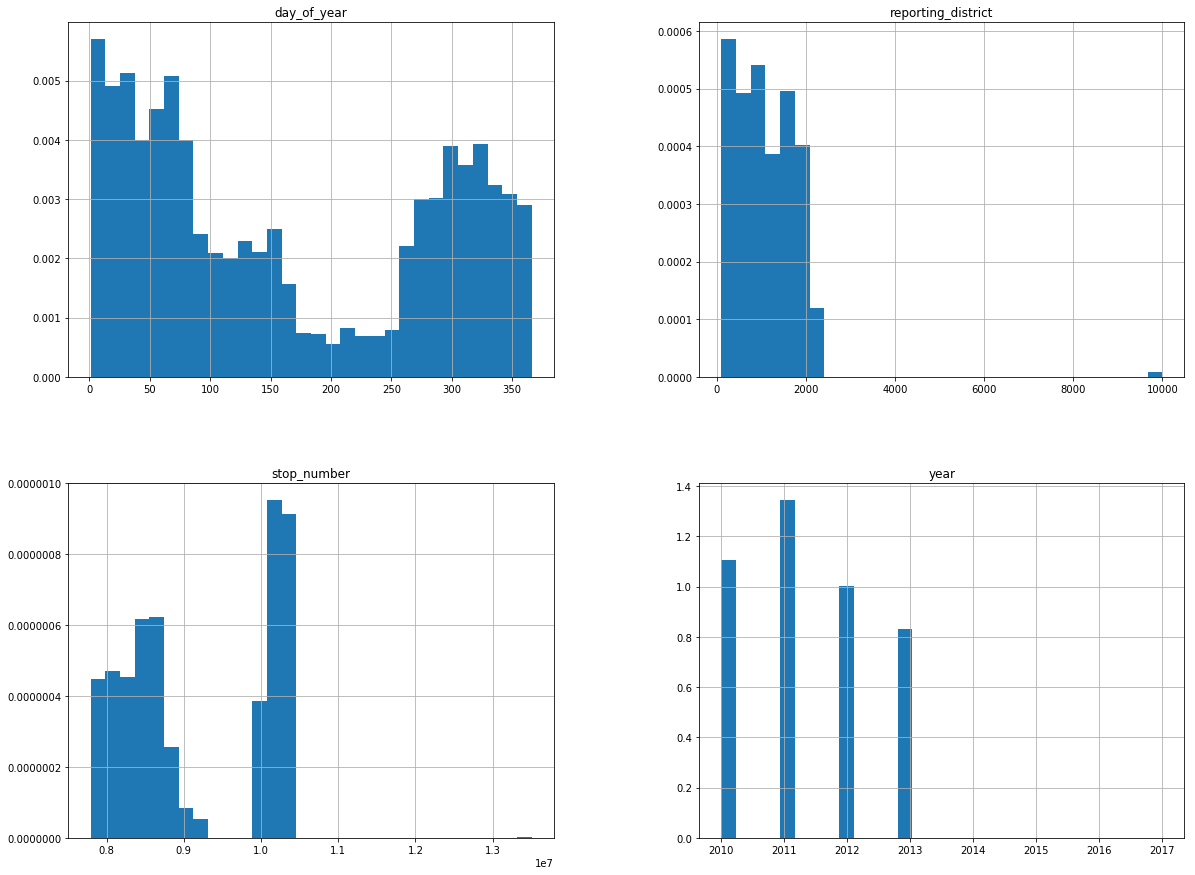

In [24]:
# Let's make a histogram to show the distributions of our numeric
# values in the dataset
%matplotlib inline
ca_stops.hist(bins=30, figsize=(20,15), normed=True)
plt.show

After cleaning the data, I can start some exploratory analysis. Let's first take a look at timeline of stops.

In [30]:
import matplotlib.pyplot as plt                    #Plotting library, similar to Matlab's
import seaborn as sns                              #Simplified visualization library built on Matplotlib

/Users/kcdeleon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


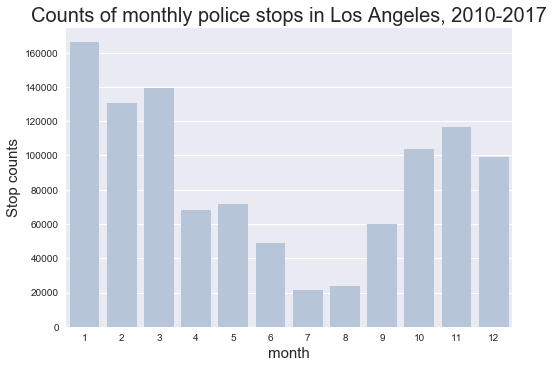

In [31]:
sns.countplot(ca_stops["month"], color="lightsteelblue")
plt.title("Counts of monthly police stops in Los Angeles, 2010-2017", fontsize = 20)
plt.xlabel("month", fontsize = 15)
plt.ylabel("Stop counts", fontsize = 15)
plt.tick_params(labelsize = 10)
plt.show()

/Users/kcdeleon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


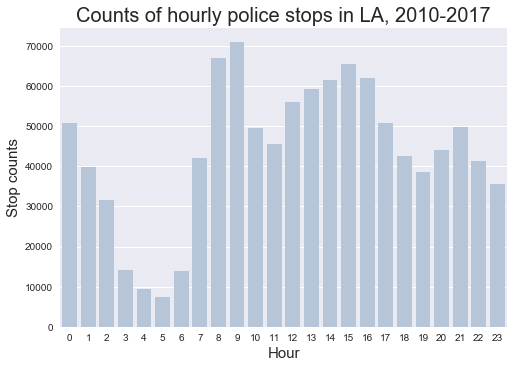

In [35]:
sns.countplot(ca_stops["hour"], color="lightsteelblue")
plt.title("Counts of hourly police stops in LA, 2010-2017", fontsize = 20)
plt.xlabel("Hour", fontsize = 15)
plt.ylabel("Stop counts", fontsize = 15)
plt.tick_params(labelsize = 10)

plt.show()

In [36]:
#Top 3 stop reasons in the mornings
ca_stops[ca_stops["hour"].apply(lambda x: x in range(6,12))]["stop_type"].value_counts().head(3)

VEH    241005
PED     47951
Name: stop_type, dtype: int64

In [37]:
#Top 3 stop reasons after mornings
ca_stops[ca_stops["hour"].apply(lambda x: x not in range(6,12))]["stop_type"].value_counts().head(3)

VEH    585168
PED    174450
Name: stop_type, dtype: int64

/Users/kcdeleon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


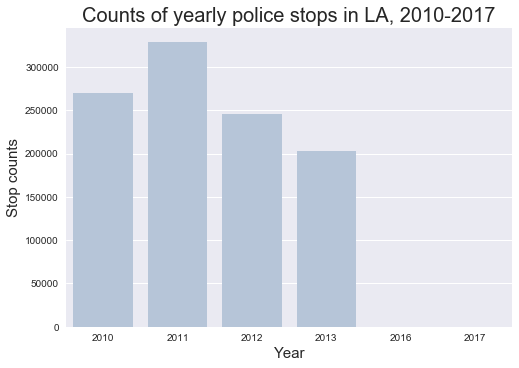

In [38]:
sns.countplot(ca_stops["year"], color="lightsteelblue")
plt.title("Counts of yearly police stops in LA, 2010-2017", fontsize = 20)
plt.xlabel("Year", fontsize = 15)
plt.ylabel("Stop counts", fontsize = 15)
plt.tick_params(labelsize = 10)

plt.show()

# Gender and race issues

What about drivers themselves? Gender, race and etc. Men vs women? Black vs asian? Let's have a look.

/Users/kcdeleon/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


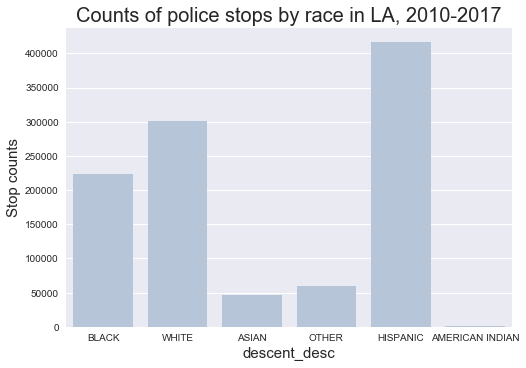

In [41]:
sns.countplot(ca_stops["descent_desc"], color="lightsteelblue")
plt.title("Counts of police stops by race in LA, 2010-2017", fontsize = 20)
plt.xlabel("descent_desc", fontsize = 15)
plt.ylabel("Stop counts", fontsize = 15)
plt.tick_params(labelsize = 10)

plt.show()

In [ ]:
division_desc1

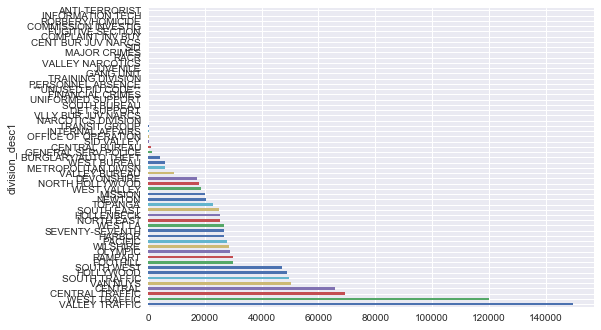

In [50]:
(     ca_stops["division_desc1"]
     .groupby(ca_stops["division_desc1"])
     .count()
     .sort_values(ascending=False)
     .plot(kind="barh")
)

I'm interested in finding interesting patterns for the Central area. Lts explore more specifically on Central area.

In [52]:
Central = ca_stops.set_index(['division_desc1']).loc['CENTRAL']
Central.head(5)

,stop_number,gender,descent_desc,stop_date,stop_time,officer1_division,reporting_district,stop_type,post_stop_activity_indicator,day_of_year,day_of_week,year,month,hour
division_desc1,,,,,,,,,,,,,,
CENTRAL,8271269,F,HISPANIC,11/23/10,17:30:00,1,2053,VEH,N,327,Tuesday,2010,11,17
CENTRAL,8322153,M,HISPANIC,12/14/10,15:00:00,1,185,VEH,N,348,Tuesday,2010,12,15
CENTRAL,7922957,M,HISPANIC,4/5/10,22:45:00,1,182,VEH,N,95,Monday,2010,4,22
CENTRAL,8312091,F,HISPANIC,12/9/10,21:50:00,1,152,VEH,N,343,Thursday,2010,12,21
CENTRAL,8053007,M,HISPANIC,6/30/10,12:05:00,1,195,VEH,N,181,Wednesday,2010,6,12


In [53]:
pd.set_option('display.max_rows', 1000)
(    Central
     .groupby('descent_desc')
     .size()
     .head(25)
     .sort_values(ascending=False)
)

descent_desc
BLACK              26713
HISPANIC           22343
WHITE              10340
ASIAN               3111
OTHER               3086
AMERICAN INDIAN      102
dtype: int64

In [54]:
Valley_Traffic = ca_stops.set_index(['division_desc1']).loc['VALLEY TRAFFIC']
Valley_Traffic.head(5)

,stop_number,gender,descent_desc,stop_date,stop_time,officer1_division,reporting_district,stop_type,post_stop_activity_indicator,day_of_year,day_of_week,year,month,hour
division_desc1,,,,,,,,,,,,,,
VALLEY TRAFFIC,12987768,F,BLACK,8/9/16,00:10:00,26,974,VEH,N,222,Tuesday,2016,8,0
VALLEY TRAFFIC,8135314,M,HISPANIC,9/13/10,11:50:00,26,1562,VEH,N,256,Monday,2010,9,11
VALLEY TRAFFIC,8093849,M,WHITE,8/11/10,13:00:00,26,909,VEH,N,223,Wednesday,2010,8,13
VALLEY TRAFFIC,8218572,M,HISPANIC,11/4/10,12:15:00,26,1958,VEH,N,308,Thursday,2010,11,12
VALLEY TRAFFIC,8200836,M,WHITE,10/26/10,14:40:00,26,1727,VEH,N,299,Tuesday,2010,10,14


In [55]:
pd.set_option('display.max_rows', 1000)
(    Valley_Traffic
     .groupby('descent_desc')
     .size()
     .head(25)
     .sort_values(ascending=False)
)

descent_desc
WHITE              71082
HISPANIC           49568
OTHER              13016
BLACK               9889
ASIAN               6003
AMERICAN INDIAN       91
dtype: int64

Stops in Central Division between 2010 and 2011

In [60]:
(Central[(Central['year'] == '2010')] 
        .groupby('descent_desc')
        .size()
        .sort_values(ascending=False)
        .head(30)
        .plot(kind="bar"))

/Users/kcdeleon/anaconda/lib/python3.6/site-packages/pandas/core/ops.py:816: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = getattr(x, name)(y)


TypeError: invalid type comparison